In [1]:
import numpy as np
import pandas as pd

from geo.geomath import vec_haversine

In [2]:
df = pd.read_parquet("data/sir010113-310113.parquet")

In [3]:
df = df.sort_values(by=['VehicleID', 'Timestamp'])

In [4]:
df['LineID'].unique().shape

(67,)

In [5]:
df['VehicleID'].unique().shape

(911,)

In [6]:
df['StopID'].unique().shape

(4728,)

In [7]:
df['JourneyID'].dropna().unique().shape

(18614,)

In [8]:
df['PatternID'].dropna().unique().shape

(465,)

In [9]:
df.isnull().sum()

Timestamp           0
LineID              0
Direction           0
PatternID     6649920
TimeFrame           0
JourneyID           0
Operator            0
Congestion          0
Lon                 0
Lat                 0
Delay               0
BlockID             0
VehicleID           0
StopID              0
AtStop              0
DateTime            0
Day                 0
Hour                0
Minute              0
dtype: int64

In [10]:
df.shape

(44455133, 19)

In [11]:
df.sort_values(by=['VehicleID', 'Timestamp']).head(20)

,Timestamp,LineID,Direction,PatternID,TimeFrame,JourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop,DateTime,Day,Hour,Minute
828520,1357109254000000,44,0,None,2013-01-02,3997,D2,0,-6.236850,53.307999,0,44005,28047,0,0,2013-01-02 06:47:34,2,6,47
829863,1357109307000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,0,44005,28047,0,0,2013-01-02 06:48:27,2,6,48
830298,1357109328000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,0,44005,28047,0,0,2013-01-02 06:48:48,2,6,48
830481,1357109336000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,0,44005,28047,0,0,2013-01-02 06:48:56,2,6,48
830851,1357109346000000,44,0,None,2013-01-02,3997,D2,0,-6.245650,53.304966,0,44005,28047,0,0,2013-01-02 06:49:06,2,6,49
831694,1357109387000000,44,0,None,2013-01-02,3997,D2,0,-6.245800,53.300999,0,44005,28047,0,0,2013-01-02 06:49:47,2,6,49
831907,1357109397000000,44,0,None,2013-01-02,3997,D2,0,-6.245800,53.300999,0,44005,28047,0,0,2013-01-02 06:49:57,2,6,49
832331,1357109407000000,44,0,None,2013-01-02,3997,D2,0,-6.246500,53.298668,0,44005,28047,0,0,2013-01-02 06:50:07,2,6,50
833230,1357109446000000,44,0,None,2013-01-02,3997,D2,0,-6.245917,53.293999,0,44005,28047,0,0,2013-01-02 06:50:46,2,6,50
833551,1357109458000000,44,0,None,2013-01-02,4260,D2,0,-6.245917,53.293999,0,44005,28047,2825,0,2013-01-02 06:50:58,2,6,50


In [12]:
df.describe()

,Timestamp,LineID,Direction,JourneyID,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop,Day,Hour,Minute
count,4.445513e+07,4.445513e+07,44455133.0,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07,4.445513e+07
mean,1.358318e+15,7.796518e+01,0.0,9.417119e+03,1.163260e-02,-6.272803e+00,5.334513e+01,-2.668891e-01,1.092438e+05,3.542925e+04,2.634347e+03,2.335773e-01,1.567200e+01,1.388823e+01,2.946707e+01
std,7.394928e+11,1.146405e+02,0.0,6.159842e+04,1.072254e-01,8.389026e-02,5.488355e-02,6.585882e+01,1.921244e+05,3.281093e+03,2.236428e+03,4.231063e-01,8.563509e+00,4.921609e+00,1.729009e+01
min,1.356998e+15,0.000000e+00,0.0,1.000000e+00,0.000000e+00,-6.617517e+00,5.306802e+01,-1.280000e+02,3.900000e+02,2.804700e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.357679e+15,2.500000e+01,0.0,2.536000e+03,0.000000e+00,-6.308650e+00,5.332005e+01,-4.800000e+01,1.602000e+04,3.330800e+04,7.560000e+02,0.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01
50%,1.358327e+15,4.000000e+01,0.0,4.718000e+03,0.000000e+00,-6.261600e+00,5.334645e+01,0.000000e+00,4.020500e+04,3.352500e+04,2.030000e+03,0.000000e+00,1.600000e+01,1.400000e+01,2.900000e+01
75%,1.358955e+15,8.300000e+01,0.0,6.769000e+03,0.000000e+00,-6.233166e+00,5.337533e+01,4.700000e+01,8.400400e+04,3.802500e+04,4.384000e+03,0.000000e+00,2.300000e+01,1.800000e+01,4.400000e+01
max,1.359633e+15,7.470000e+02,0.0,9.998560e+05,1.000000e+00,-6.052917e+00,5.360873e+01,1.270000e+02,8.350020e+05,4.307800e+04,7.552000e+03,1.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [13]:
df['LineID'].unique()

array([ 44,  63,  59, 111,  14,  46,  75, 451,  17,  27,  56,  15,   1,
        49, 150,  65,   0, 271,  83,  67,  25, 122,  38, 120,  66,   9,
        39, 220,  37,  40,  13,  32, 130,  31,  29,  42,  53, 142, 171,
       238, 272,  41, 332,  33, 140, 102,  18, 114, 145, 118,   4,  84,
         7,  11,  54, 116,  79, 151,  76,  68,  51,  16, 747, 123, 331,
       104,  86])

## Calculate the Time and Distance Between Consecutive Points
The distance between consecutive points will first be approximated by the geodesic distance using the [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula). See also [here](https://www.movable-type.co.uk/scripts/latlong.html).

Calculations are performed on a per vehicle basis, with records sorted in ascending order by timeframe.

In [14]:
vehicles = df['VehicleID']

In [15]:

df['dt'] = df['Timestamp'].diff()
df['dt'] = df['dt'].fillna(value=0.0)
df['dt'] = df['dt'] / 1000000

In [16]:
df.head()

,Timestamp,LineID,Direction,PatternID,TimeFrame,JourneyID,Operator,Congestion,Lon,Lat,...,BlockID,VehicleID,StopID,AtStop,DateTime,Day,Hour,Minute,dx,dt
828520,1357109254000000,44,0,None,2013-01-02,3997,D2,0,-6.236850,53.307999,...,44005,28047,0,0,2013-01-02 06:47:34,2,6,47,0.0,0.0
829863,1357109307000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,...,44005,28047,0,0,2013-01-02 06:48:27,2,6,48,0.0,53.0
830298,1357109328000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,...,44005,28047,0,0,2013-01-02 06:48:48,2,6,48,0.0,21.0
830481,1357109336000000,44,0,None,2013-01-02,3997,D2,0,-6.239767,53.305183,...,44005,28047,0,0,2013-01-02 06:48:56,2,6,48,0.0,8.0
830851,1357109346000000,44,0,None,2013-01-02,3997,D2,0,-6.245650,53.304966,...,44005,28047,0,0,2013-01-02 06:49:06,2,6,49,0.0,10.0


In [17]:
df['dx'] = 0.0
lat0 = df['Lat'][:-1].to_numpy()
lon0 = df['Lon'][:-1].to_numpy()
lat1 = df['Lat'][1:].to_numpy()
lon1 = df['Lon'][1:].to_numpy()
dist = vec_haversine(lat0, lon0, lat1, lon1)
df['dx'] = np.insert(dist, 0, 0.0)

In [18]:
dist.shape

(44455132,)

In [19]:
lat0.shape, lon1.shape, lat1.shape, lon1.shape

((44455132,), (44455132,), (44455132,), (44455132,))

In [20]:
dist.shape

(44455132,)

In [21]:
df.shape

(44455133, 21)

In [22]:
lon1.shape

(44455132,)

Here we set the `dx` column to the calculated distances, making sure that we keep the appropriate dimension. The vehicle transitions are reset to zero using a very simple trick. The `vehicles` series contains the sequence of vehicle identifiers in the same order as in the base data frame. When the difference of two sequential vehicle identifiers is not zero, we are at a border between different vehicle identifiers. Here we can safely set the differences to zero.

In [23]:
df.loc[vehicles.diff() != 0, ['dx', 'dt']] = 0.0

In [24]:
unique_vehicles = df['VehicleID'].unique()

In [49]:
# df[df['VehicleID'] == unique_vehicles[10]].head(20)

In [26]:
def naive_speed(row):
    if row['dt'] == 0.0:
        return 0.0
    else:
        return row['dx'] / row['dt'] * 3.6

In [35]:
df['v'] = 0.0
dx = df['dx'].to_numpy()
dt = df['dt'].to_numpy()
v = np.zeros_like(dx)
zi = dt > 0
v[zi] = dx[zi] / dt[zi] * 3.6
df['v'] = v

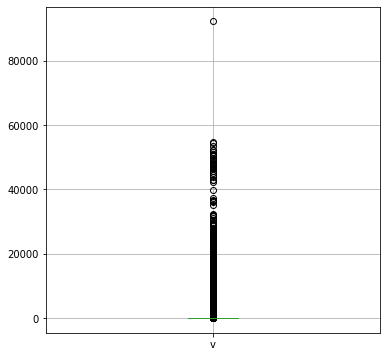

In [55]:
%matplotlib inline
df.boxplot(['v'], figsize=(6,6))

In [56]:
# df['v'].plot.kde()

In [62]:
df[df['v'] > 120].shape

(402278, 22)

In [138]:
vt = df.loc[(df['VehicleID'] == 43055) & (df['Day'] == 2) & (df['Hour'] == 16),['Timestamp', 'dt', 'Lat', 'Lon', 'dx']].sort_values(['Timestamp'])

In [139]:
vt.to_csv("data/43055.csv", index=False)

In [130]:
import folium

In [131]:
points = list(zip(vt['Lat'].to_numpy(), vt['Lon'].to_numpy()))

In [132]:
map = folium.Map()

In [133]:
polyline = folium.vector_layers.PolyLine(points)

In [134]:
map.fit_bounds(points)

In [135]:
# polyline.add_to(map)

In [136]:
for p in points:
    folium.map.Marker(p).add_to(map)

In [137]:
map

In [65]:
df[df['v'] > 120]['VehicleID'].unique().shape

(910,)